## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import BatchNormalization

#將BatchNormalization放在input_layer之後
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer=keras.layers.Input(input_shape)
    BN= BatchNormalization()(input_layer)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x=keras.layers.Dense(units=n_units,
                                 activation='relu',
                                 name='hidden_layer'+str(i+1))(BN)
            
        else:
            x=keras.layers.Dense(units=n_units,
                                 activation='relu',
                                 name='hidden_layer'+str(i+1))(input_layer)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
LEARNING_RATE=1e-3
EPOCHS=50
BATCH_SIZE=1024
MOMENTUM=0.95

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
optimizer= keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)

model.fit(x_train, y_train,
         epochs=EPOCHS,
         batch_size=BATCH_SIZE,
         validation_data=(x_test,y_test),
         shuffle=True)

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.1972 - acc: 0.2013 - val_loss: 2.0575 - val_acc: 0.2651
Epoch 2/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.0025 - acc: 0.2880 - val_loss: 1.9541 - val_acc: 0.3113
Epoch 3/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.9268 - acc: 0.3269 - val_loss: 1.8996 - val_acc: 0.3407
Epoch 4/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8823 - acc: 0.3461 - val_loss: 1.8644 - val_acc: 0.3562
Epoch 5/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8516 - acc: 0.3595 - val_loss: 1.8387 - val_acc: 0.3643
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8297 - acc: 0.3674 - val_loss: 1.8189 - val_acc: 0.3728
Epoch 7/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8103 - acc: 0.3744 - val_loss: 1.8032 - val_ac

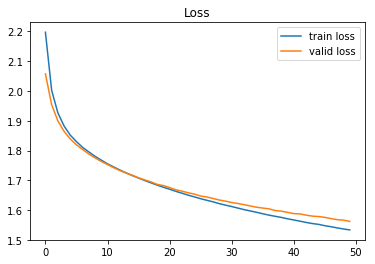

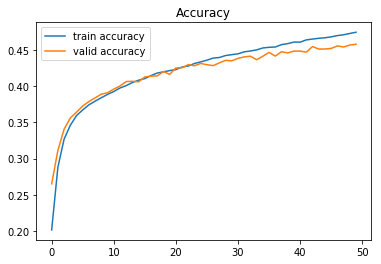

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [22]:
#將BatchNormalization放在output_layer之前
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer=keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x=keras.layers.Dense(units=n_units,
                                 activation='relu',
                                 name='hidden_layer'+str(i+1))(input_layer)
            
        else:
            x=keras.layers.Dense(units=n_units,
                                 activation='relu',
                                 name='hidden_layer'+str(i+1))(input_layer)
    BN= BatchNormalization()(x)        
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [23]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
optimizer= keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)

model.fit(x_train, y_train,
         epochs=EPOCHS,
         batch_size=BATCH_SIZE,
         validation_data=(x_test,y_test),
         shuffle=True)

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.2142 - acc: 0.1846 - val_loss: 2.0967 - val_acc: 0.2471
Epoch 2/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.0301 - acc: 0.2762 - val_loss: 1.9772 - val_acc: 0.3023
Epoch 3/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.9426 - acc: 0.3171 - val_loss: 1.9153 - val_acc: 0.3289
Epoch 4/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.8935 - acc: 0.3361 - val_loss: 1.8768 - val_acc: 0.3434
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8619 - acc: 0.3507 - val_loss: 1.8516 - val_acc: 0.3526
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.8389 - acc: 0.3599 - val_loss: 1.8315 - val_acc: 0.3640
Epoch 7/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.8211 - acc: 0.3675 - val_loss: 1.8154 - val_acc

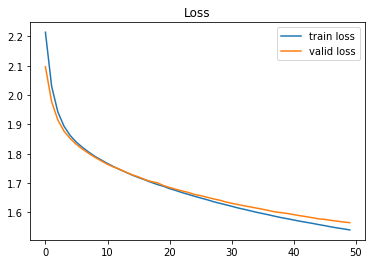

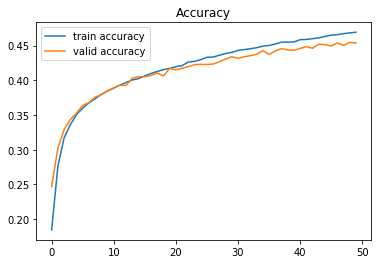

In [24]:
"""
將結果繪出
"""
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [25]:
#將BatchNormalization放在input_layer之後
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer=keras.layers.Input(input_shape)
    BN= BatchNormalization()(input_layer)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x=keras.layers.Dense(units=n_units,
                                 activation='relu',
                                 name='hidden_layer'+str(i+1))(BN)
            
        else:
            x=keras.layers.Dense(units=n_units,
                                 activation='relu',
                                 name='hidden_layer'+str(i+1))(input_layer)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [33]:
"""Code Here
設定超參數
"""
LEARNING_RATE=1e-3
EPOCHS=30
BATCH_SIZE=[16,32,128,256]
MOMENTUM=0.95

In [34]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
optimizer= keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)

for bs in BATCH_SIZE:
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=bs,
             validation_data=(x_test,y_test),
             shuffle=True)
    
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_tag="batch_size-%s" %str(bs)
    results[exp_tag]={"train-loss":train_loss,
                      "valid-loss":valid_loss,
                      "train-acc":train_acc,
                      "valid-acc":valid_acc}

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 31s 619us/step - loss: 1.8174 - acc: 0.3490 - val_loss: 1.7011 - val_acc: 0.3933
Epoch 2/30
50000/50000 [==============================] - 26s 518us/step - loss: 1.6524 - acc: 0.4092 - val_loss: 1.6136 - val_acc: 0.4236
Epoch 3/30
50000/50000 [==============================] - 26s 514us/step - loss: 1.5868 - acc: 0.4363 - val_loss: 1.5830 - val_acc: 0.4362
Epoch 4/30
50000/50000 [==============================] - 27s 535us/step - loss: 1.5415 - acc: 0.4523 - val_loss: 1.5431 - val_acc: 0.4534
Epoch 5/30
50000/50000 [==============================] - 27s 532us/step - loss: 1.5089 - acc: 0.4649 - val_loss: 1.4988 - val_acc: 0.4702
Epoch 6/30
50000/50000 [==============================] - 25s 507us/step - loss: 1.4874 - acc: 0.4738 - val_loss: 1.5128 - val_acc: 0.4634
Epoch 7/30
50000/50000 [==============================] - 24s 481us/step - loss: 1.4659 - acc: 0.4814 - val_loss: 1.

Epoch 29/30
50000/50000 [==============================] - 12s 243us/step - loss: 1.0033 - acc: 0.6451 - val_loss: 1.5110 - val_acc: 0.4968
Epoch 30/30
50000/50000 [==============================] - 12s 243us/step - loss: 0.9986 - acc: 0.6488 - val_loss: 1.4999 - val_acc: 0.5091
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 110us/step - loss: 0.9220 - acc: 0.6792 - val_loss: 1.4401 - val_acc: 0.5167
Epoch 2/30
50000/50000 [==============================] - 6s 115us/step - loss: 0.9125 - acc: 0.6818 - val_loss: 1.4395 - val_acc: 0.5178
Epoch 3/30
50000/50000 [==============================] - 6s 110us/step - loss: 0.9095 - acc: 0.6836 - val_loss: 1.4432 - val_acc: 0.5182
Epoch 4/30
50000/50000 [==============================] - 5s 110us/step - loss: 0.9074 - acc: 0.6847 - val_loss: 1.4489 - val_acc: 0.5154
Epoch 5/30
50000/50000 [==============================] - 6s 118us/step - loss: 0.9048 - acc: 0.6868 - val_loss: 1.463

50000/50000 [==============================] - 4s 80us/step - loss: 0.8134 - acc: 0.7237 - val_loss: 1.5269 - val_acc: 0.5142
Epoch 28/30
50000/50000 [==============================] - 4s 86us/step - loss: 0.8119 - acc: 0.7230 - val_loss: 1.5280 - val_acc: 0.5111
Epoch 29/30
50000/50000 [==============================] - 4s 81us/step - loss: 0.8107 - acc: 0.7237 - val_loss: 1.5242 - val_acc: 0.5099
Epoch 30/30
50000/50000 [==============================] - 4s 81us/step - loss: 0.8100 - acc: 0.7246 - val_loss: 1.5272 - val_acc: 0.5149


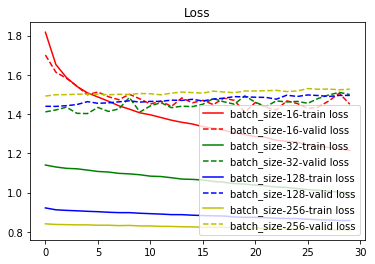

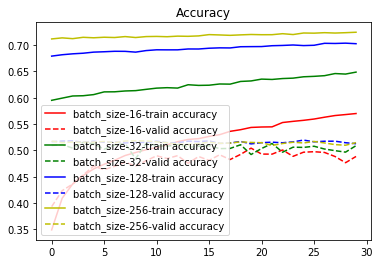

In [43]:
color_bar=['r','g','b','y']
for i,cond in enumerate(results.keys()):    
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], "-", label=cond+"-train loss",color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-loss"])), results[cond]["valid-loss"], "--", label=cond+"-valid loss",color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()

for i,cond in enumerate(results.keys()): 
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-",label=cond+"-train accuracy",color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label=cond+"-valid accuracy",color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()